In [10]:
from ucimlrepo import fetch_ucirepo 
from implementations.id3 import DecisionTreeClassifier
from implementations import id3
from implementations.bayes import NaiveBayes
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
 
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
X = np.array(mushroom.data.features)
y = np.array(mushroom.data.targets.poisonous) 

In [4]:
c = Counter()
c.update(y)

<BarContainer object of 2 artists>

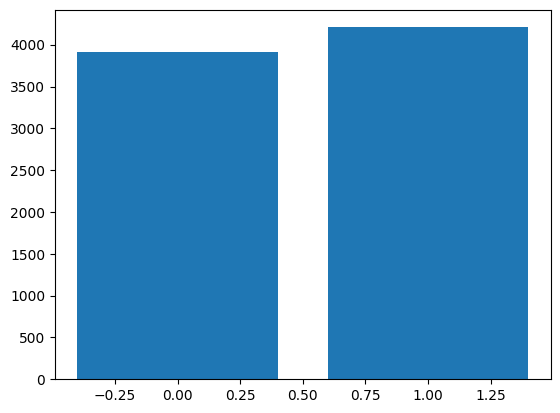

In [5]:
plt.bar([x for x in range(2)], c.values())

In [8]:
X

array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

In [9]:
X.ndim

2

In [11]:
enc = OneHotEncoder(handle_unknown='ignore')

In [12]:
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [17]:
one_hot_X = enc.transform(X).toarray()

In [19]:
one_hot_X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
new_y = []
for d in y:
    if d == "e":
        new_y.append(1)
    else:
        new_y.append(0)

In [24]:
importlib.reload(id3)
single_tree_accuracies = []
for _ in range(1):
    x_train, x_test, y_train, y_test = train_test_split(one_hot_X, new_y, test_size=0.1)
    dc = id3.DecisionTreeClassifier(10)
    dc.fit(x_train, y_train)
    
    samples = len(y_test)
    correctly_predicted = 0
    for sample, gt in zip(x_test, y_test):
        prediction = dc.predict(sample)
        print(int(prediction), gt)
        if prediction == gt:
            correctly_predicted += 1
    
    print(f"Accuracy: {(correctly_predicted/samples)*100:.2f}%")
    single_tree_accuracies.append((correctly_predicted/samples)*100)
print(f"Mean accuracy: {np.mean(single_tree_accuracies)}")

data 7311 403 6908
Inside 0 1.0 None None
data 7311 3 7308
Inside 1 1.0 0 1.0
data 7311 2837 4474
Inside 2 1.0 0 1.0
data 7311 753 6558
Inside 3 1.0 0 1.0
data 7311 29 7282
Inside 4 1.0 0 1.0
data 7311 3286 4025
Inside 5 1.0 0 1.0
data 7311 2090 5221
Inside 6 1.0 0 1.0
data 7311 4 7307
Inside 7 1.0 6 1.0
data 7311 2317 4994
Inside 8 1.0 6 1.0
data 7311 2900 4411
Inside 9 1.0 6 1.0
data 7311 157 7154
Inside 10 1.0 6 1.0
data 7311 41 7270
Inside 11 1.0 6 1.0
data 7311 1337 5974
Inside 12 1.0 6 1.0
data 7311 1660 5651
Inside 13 1.0 6 1.0
data 7311 2067 5244
Inside 14 1.0 6 1.0
data 7311 126 7185
Inside 15 1.0 6 1.0
data 7311 14 7297
Inside 16 1.0 6 1.0
data 7311 14 7297
Inside 17 1.0 6 1.0
data 7311 933 6378
Inside 18 1.0 6 1.0
data 7311 962 6349
Inside 19 1.0 6 1.0
data 7311 4279 3032
Inside 20 1.0 6 1.0
data 7311 3032 4279
Inside 21 1.0 20 1.0
data 7311 351 6960
Inside 22 1.0 21 1.0
data 7311 169 7142
Inside 23 1.0 21 1.0
data 7311 1961 5350
Inside 24 1.0 21 1.0
data 7311 358 6953
Insid